# Sampling distributions

### Notebook setup

In [1]:
# Install stats library
%pip install --quiet ministats 


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Figures setup
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    style="whitegrid",
    rc={'figure.figsize': (7, 2)},
)
# High-resolution figures please
%config InlineBackend.figure_format = 'retina'

def savefig(fig, filename):
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

<Figure size 640x480 with 0 Axes>

## Introduction

## Probability models

The concept of a random variable, denoted $X$, is a key building block in probability theory. The random variable $X$ is a quantity that can take on different values, and it is described by a probability distribution function $f_X$, which we use to compute the probability of different possible outcomes of the random variable $X$.

When learning about random variables, readers are usually exposed to numerous formulas and equations for describing probability distributions. These math equations can be hard to understand, especially for people who haven't done math recently. Using computer models, however, makes probability concepts much more accessible. Specifically, computers give us two additional points of view of the math equations:

- **Visualizations**. Plotting the probability distribution $f_X$ for the random variable $X$ gives you a visual representation of the possible values this variable can have.
- **Computer-assisted calculations**. Probability calculations can be done easily using Python as a calculator.

### Probability model for the general population

Let's now build the specific probability model we need for the analysis of the students' IQ scores.
We know the IQ scores in the general population has mean $\mu=100$ and standard deviation $\sigma=15$.
We will denote the general population as $X \sim \mathcal{N}(\mu=100,\sigma=15)$.


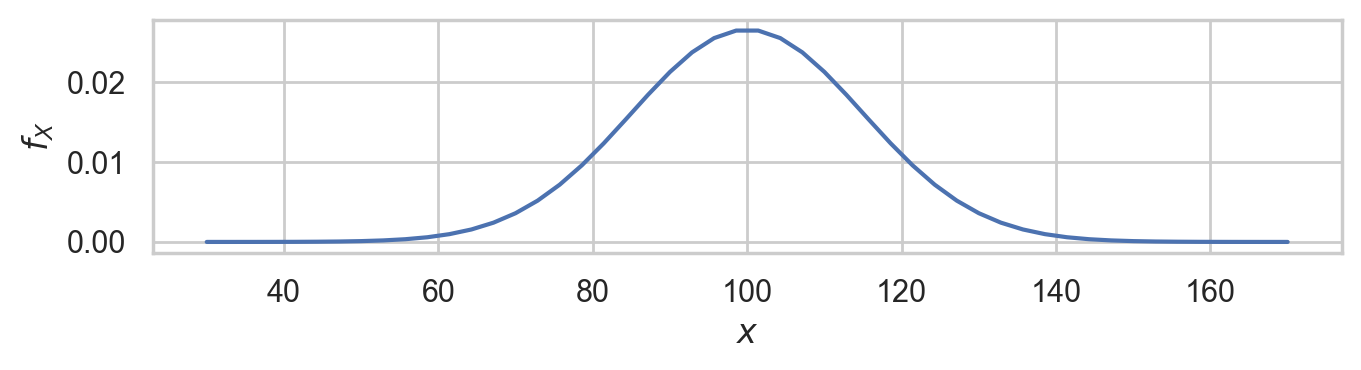

In [3]:
import numpy as np
from scipy.stats import norm

mu = 100
sigma = 15
rvX = norm(mu, sigma)

xs = np.linspace(30, 170)
ax = sns.lineplot(x=xs, y=rvX.pdf(xs));
ax.set_xlabel("$x$")
ax.set_ylabel("$f_{X}$")

savefig(plt.gcf(), "figures/samples_from_rvX_n30.png")

This is the distribution of IQ scores we can expect to observe for the general population.

### Random samples from the general population

We'll use the notation $\mathbf{X} = (X_1, X_2, \ldots, X_{30})$ to describe a *random sample* from the general population.

To get a idea of what these random samples look like,
we can generate $10$ samples $\mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_3, \ldots, \mathbf{x}_{10}$ of size $n=30$ from $X \sim \mathcal{N}(\mu=100, \sigma=15)$ as follows.

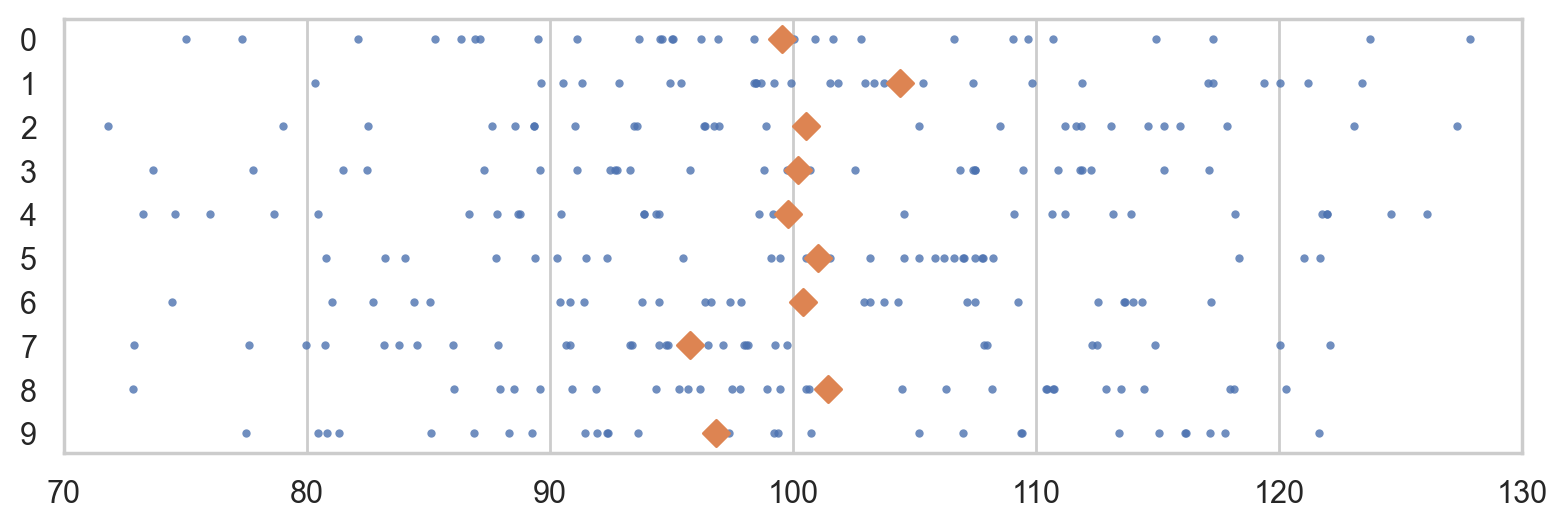

In [4]:
np.random.seed(5)

samples = [rvX.rvs(30) for i in range(10)]
with plt.rc_context({"figure.figsize":(8,2.8)}):
    ax = sns.stripplot(samples, orient="h", s=3, color="C0", alpha=0.8, jitter=0)
    ax.set_xlim([70,130])
    for i, sample in enumerate(samples):
        xbar = np.mean(sample)
        ax.scatter(xbar, i, marker="D", s=45, color="C1", zorder=10)

savefig(plt.gcf(), "figures/samples_from_rvX_n30.png")

The diamond markers indicate the position of the sample means computed from each sample:
$[\overline{\mathbf{x}}_1, \overline{\mathbf{x}}_2, \overline{\mathbf{x}}_3, \ldots, \overline{\mathbf{x}}_{10}]$.


In the next section we're going to talk about the distribution of the diamond shapes,
which correspond to the means computed from random samples.

## Sampling distributions

The *sampling distribution* of the mean for samples of size $n=30$ from the general population $X \sim \mathcal{N}(100,15)$ is the probability distribution of the random variable $\overline{\mathbf{X}} = \mathbf{Mean}(\mathbf{X})$,
where $\mathbf{X} = (X_1, X_2, \ldots, X_{30})$ is a *random sample* from $\mathcal{N}(100,15)$. The sampling distribution describes the kind of means we can expect to observe if
we compute the mean for a sample of size $n=30$ from the standard normal.


To visualize the sampling distribution of the mean $\overline{\mathbf{X}} = \texttt{mean}(\mathbf{X})$,
we can generate $N=1000$ samples from the population model:
$\mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_3, \ldots, \mathbf{x}_{1000}$,
then plot a histogram of the means computed from the $1000$ random samples,
`xbars` = $[\overline{\mathbf{x}}_1, \overline{\mathbf{x}}_2, \overline{\mathbf{x}}_3, \ldots, \overline{\mathbf{x}}_{1000}]$,
where $\overline{\mathbf{x}}_j$ denotes the sample mean computed from the data in the $j$th sample,
$\overline{\mathbf{x}}_j = \texttt{mean}(\mathbf{x}_j)$.

In [5]:
N = 1000  # number of random samples
n = 30    # sample size

xbars = []
for j in range(0, N):
    sample = rvX.rvs(n)
    xbar = np.mean(sample)
    xbars.append(xbar)

# xbars[0:5]

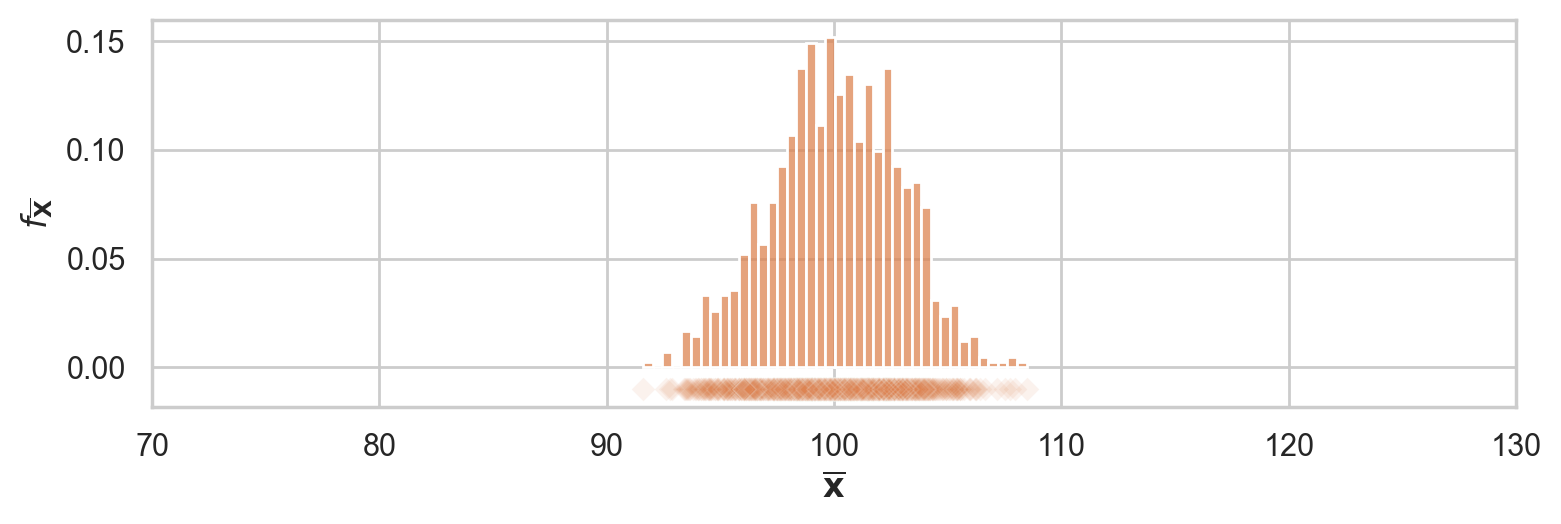

In [6]:
with plt.rc_context({"figure.figsize":(8,2.8)}):
    ax = sns.histplot(xbars, color="C1", bins=40, stat="density")
    ax.set_xlim([70,130])
    sns.scatterplot(x=xbars, y=-0.01, color="C1", marker="D", alpha=0.1, ax=ax)
    ax.set_xlabel("$\\overline{\\mathbf{x}}$")
    ax.set_ylabel("$f_{\\overline{\\mathbf{X}}}$");
    savefig(plt.gcf(), "figures/hist_sampling_dist_mean_rvX_n30_N1000.png")

The above figure shows the sampling distribution of the mean for samples of size $n=30$ from the general population model $X \sim \mathcal{N}(\mu=100, \sigma=15)$.
The histogram shows the "density of diamond shapes," and provides a representation of the sampling distribution of the mean $\overline{\mathbf{X}} = \tt{mean}(\mathbf{X})$.


### Two ways to work with sampling distributions

You can use either a math description (analytical formulas) or a computational description (simulations) for the sampling distribution. Although the two descriptions seem very different on the surface, they both describe the same underlying concept. I've compiled a little list of the key properties of the estimator $\tt{mean}$ to show the correspondences between two types of descriptions.


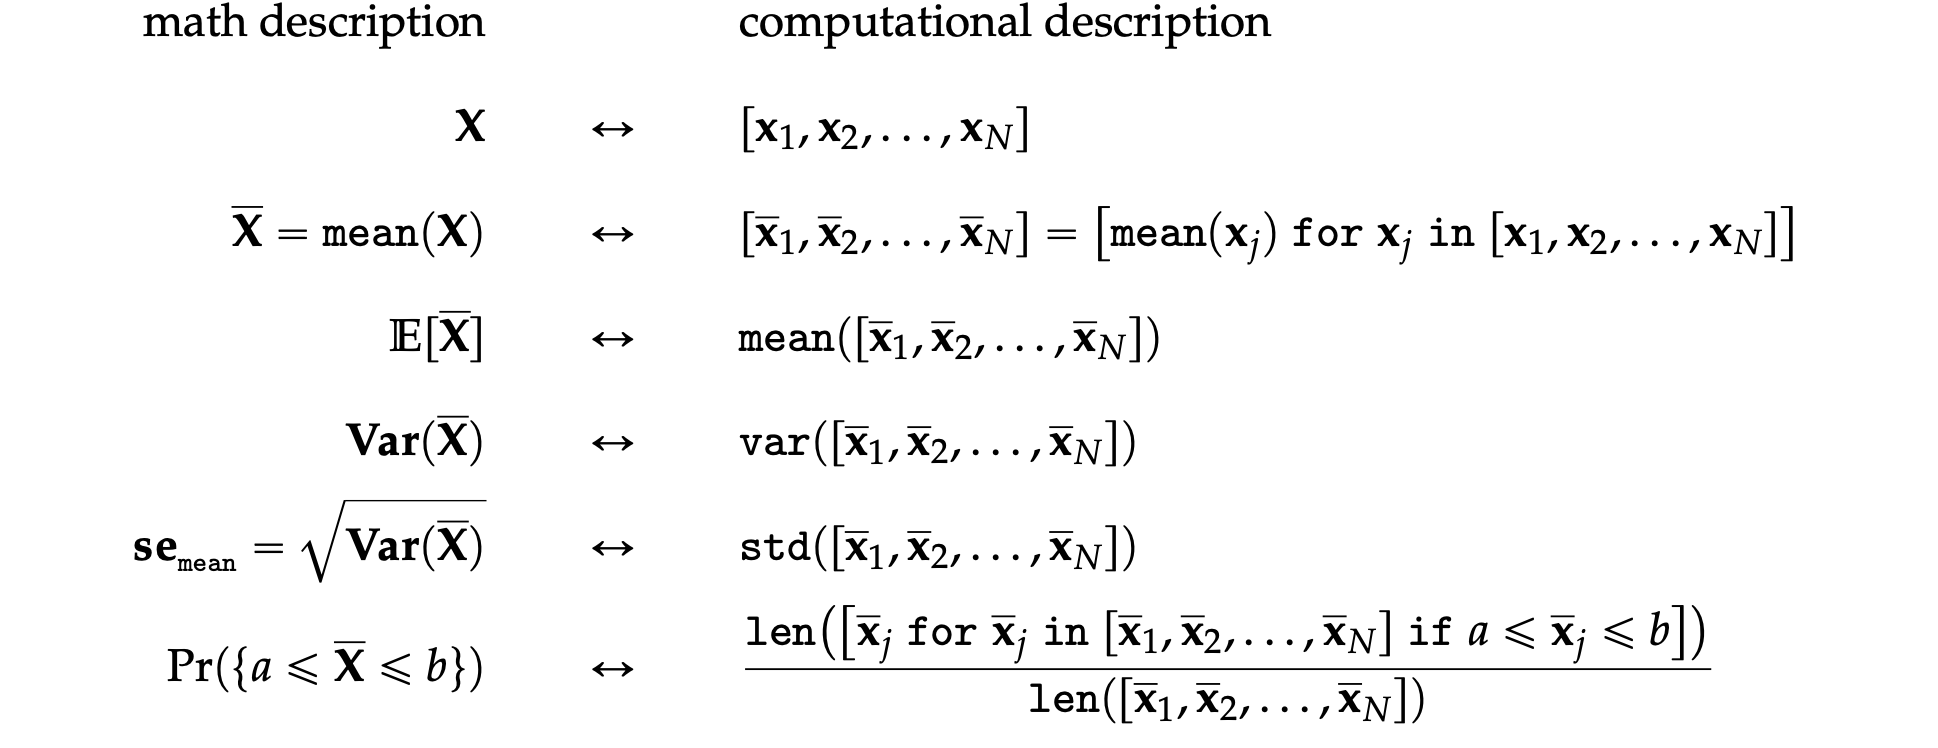


The two descriptions give us two different ways to do probability calculations. For example, we can visualize the sampling distribution of the estimator $\tt{mean}$, by plotting the probability density function of the random variable $\overline{\mathbf{X}} = \tt{mean}(\mathbf{X})$ or by plotting a histogram of the values $[\tt{mean}(\mathbf{x}_1), \tt{mean}(\mathbf{x}_2), \ldots, \tt{mean}(\mathbf{x}_N)]$.

Suppose someone asks us to compute the probability $\Pr(\{ a \leq \overline{\mathbf{X}} \leq b \})$, which describes the probability that the estimate computed from a random sample of size $n$ will be between $a$ and $b$. We can obtain the answer using the probability description by calculating the difference in the cumulative distribution function $\Pr(\{ a \leq \overline{\mathbf{X}} \leq b \}) = F_{\overline{\mathbf{X}}}(b) - F_{\overline{\mathbf{X}}}(a)$.  
Using the computational approach, we can obtain the same probability calculating by computing the \emph{proportion} of observations in the list $[\tt{mean}(\mathbf{x}_1), \tt{mean}(\mathbf{x}_2), \ldots, \tt{mean}(\mathbf{x}_N)]$ whose values are between $a$ and $b$. 


### Sampling distribution for different sample sizes

How is the sampling distribution of the mean affected by sample size?
To study this,
we'll generate samples of size $n=10$, $n=30$, and $n=100$
and inspect their meeans.

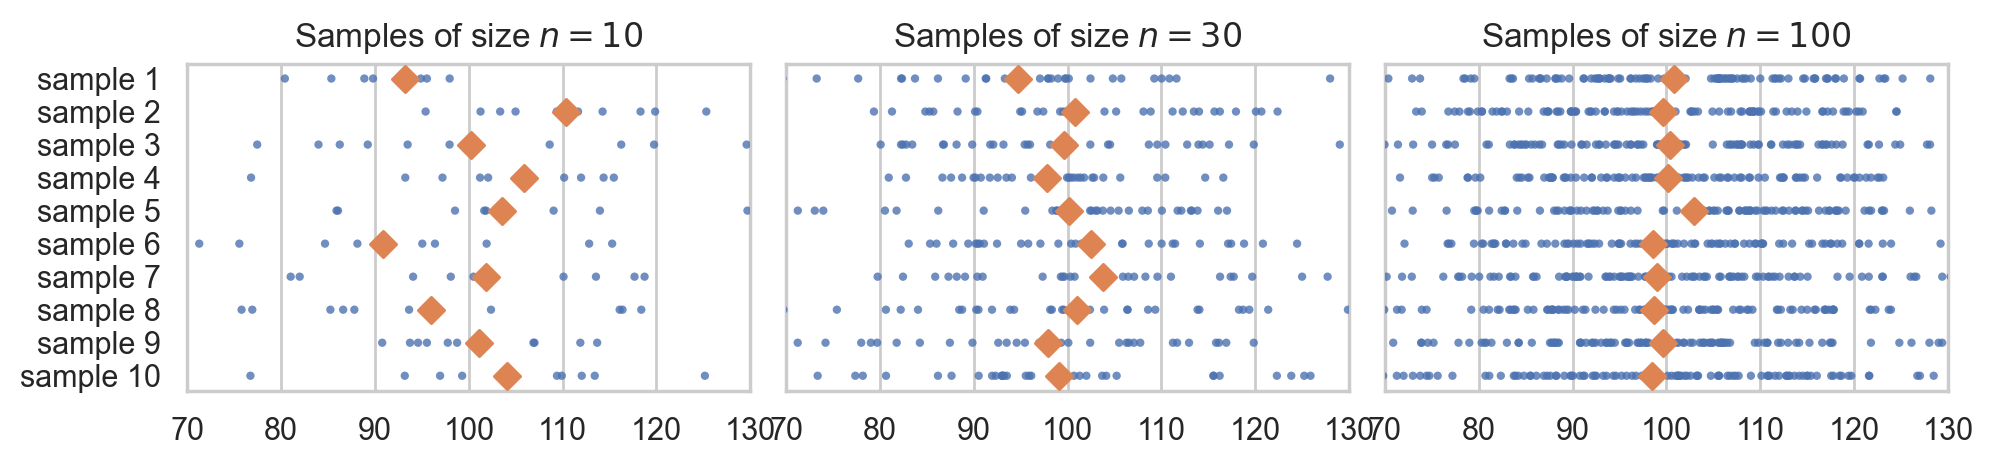

In [7]:
from ministats import plot_samples_panel
plot_samples_panel(rvX, xlims=[70,130])

savefig(plt.gcf(), "figures/samples_from_N10015_n10_n30_n100.png")

Let's now generate 10000 samples and plot he sampling distribution of the mean for each sample size.

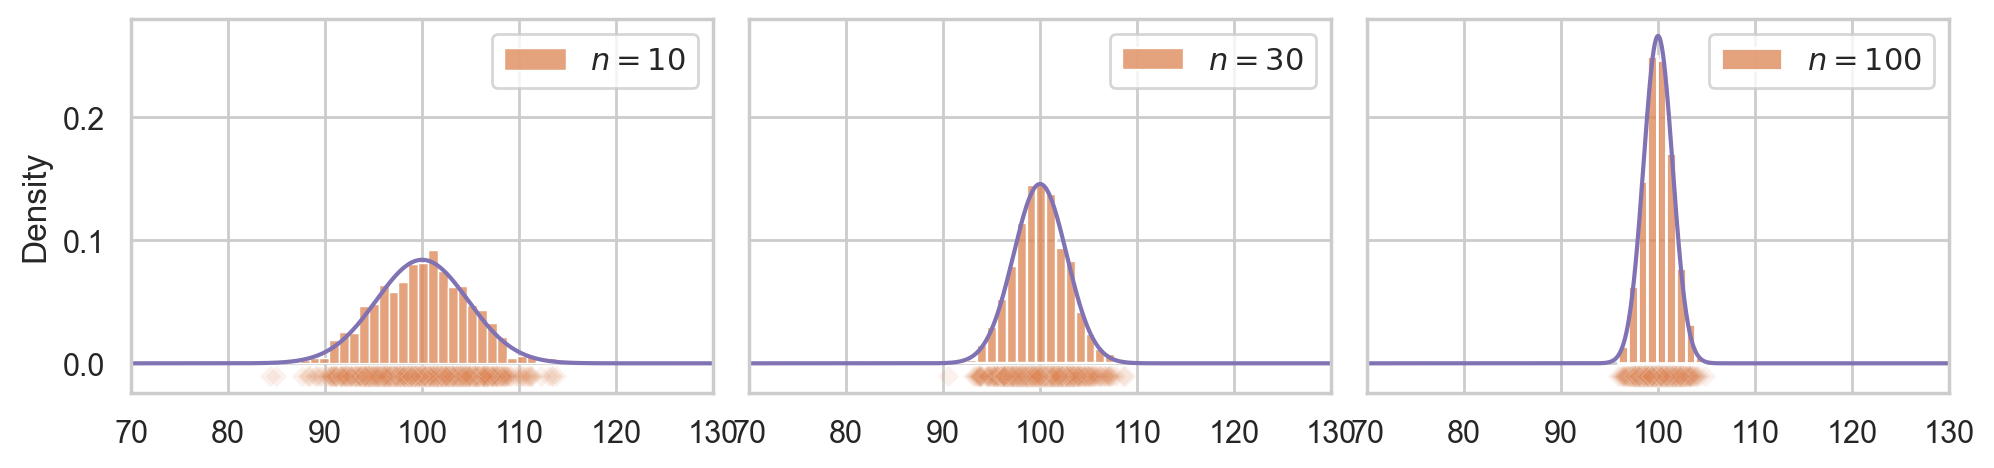

In [8]:
from ministats import plot_sampling_dists_panel
np.random.seed(47)
xbarss = plot_sampling_dists_panel(rvX, xlims=[70,130], binwidth=1)

savefig(plt.gcf(), "figures/sampling_dist_of_N10015_n10_n30_n100.png")

### Central limit theorem

The central limit theorem is a math formula for the sampling distribution of the mean. It is not an exact formula, but an analytical approximation that gets better and better with larger sample sizes. 

The formal statement of the theorem considers a random sample of size $n$ denoted $\mathbf{X} = (X_{1}, X_{2},\dots X_n)$, where each $X_i$ represents an independent draw from the random variable $X$. Let $\mu$ denote the mean of the random variable $X$, and let $\sigma$ denote the standard deviation of $X$. Then the sampling distribution of the mean $\overline{\mathbf{X}} = \frac{1}{n}\sum_{i=1}^n X_i$ will converge to a normal distribution:

$$
  \overline{\mathbf{X}}  \;\; \to \;\; \mathcal{N}\Big(\mu, \tfrac{\sigma}{\sqrt{n}} \Big),
$$
as the sample size $n$ goes to infinity.

The central limit theorem tells us three important facts:

- The mean of the sampling distribution $\overline{\mathbf{X}}$
  will approximately equal the population mean $\mu$.
  This means, if we use the sample mean to estimate the population mean,
  in the long term our estimates will be accurate.
- The second fact that the deviations of $\overline{\mathbf{X}}$
  from the true value $\mu$ will be normally distributed.
  No matter what population $X$ we start from (not necessary normal),
  the sample means will be normally distributed.
- The third fact is a precise math formula for the standard deviation
  of the sampling distribution as a function of the population
  standard deviation $\sigma$ and the sample size $n$:
  $\mathbf{se} = \frac{\sigma}{\sqrt{n}}$.

Recall the *standard error* is defined as the standard deviation of the sampling distribution.

### Verify central limit theorem

Let's see if the standard errors of the sampling distributions for samples of size $n=10$,
we have simulated are close to the formula predicted by the central limit theorem.

First use simulation to find the true value of the standard error.

In [9]:
N = 10000
xbars10 = [np.mean(rvX.rvs(10)) for j in range(0, N)]    
np.std(xbars10)

4.713454163708772

Let's compare these observations from the simulation,
to the theoretical standard deviations predicted by the CLT.

In [10]:
from math import sqrt
sigma / sqrt(10)

4.743416490252569

Let's now verify the predictions of the central limit theorem for samples of size $n=30$

In [11]:
xbars30 = [np.mean(rvX.rvs(30)) for j in range(0, N)]
np.std(xbars30), sigma/sqrt(30)

(2.7260339953850257, 2.7386127875258306)

Finally,
let's check the predictions for $n=100$.

In [12]:
xbars100 = [np.mean(rvX.rvs(100)) for j in range(0, N)]
np.std(xbars100), sigma/sqrt(100)

(1.4930938336228587, 1.5)

We see there is quite close agreement between the central limit theorem formula for the standard error, and the formula gets more and more accurate for larger $n$.

## Conclusion

## Links